___CAI___  
*Elías Abad Rocamora*  
*Víctor Novelle Moriano* 

# Lab Session 1: Powerlaws
---

## 2. Distribution of family names
### Exercise 1

First, we import the necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

Now, we transform the .csv file into a *data frame*, in order to work more comfortably.

In [3]:
df = pd.read_csv('apellidos.csv',sep=';')
print(df)

       Orden   Apellido  Apellido 1  Apellido 2  Ambos apellidos
0          1     GARCIA     1473189     1489086            80494
1          2   GONZALEZ      927393      935408            41786
2          3  RODRIGUEZ      926148      934360            43397
3          4  FERNANDEZ      919724      929292            52364
4          5      LOPEZ      872744      879628            35185
...      ...        ...         ...         ...              ...
73886  74011    ZOTESCU          20           0                0
73887  74012    ZOUGANI          20           0                0
73888  74013    ZOUITEN          20           0                0
73889  74014      ZSIGA          20           0                0
73890  74015      ZUDOR          20           0                0

[73891 rows x 5 columns]


Finally, we proceed to plot the requested variables.

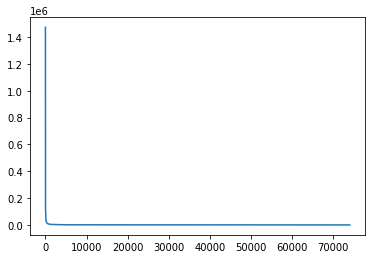

In [4]:
plt.plot(df['Orden'],df['Apellido 1'])
plt.show()

In this plot, we can see that a large amount of surnames is infrequent.  
We have also plotted the first 100 surnames in order to show that a decreasing tendency is present (zoom on the vertical line on the left).

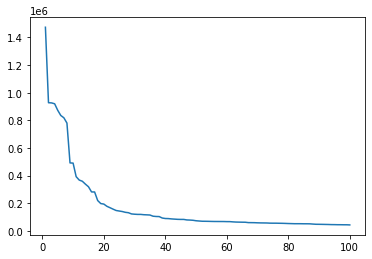

In [5]:
plt.plot(df[:100]['Orden'],df[:100]['Apellido 1'])
plt.show()

---
### Exercise 3

Plot using logarithms in both axes.

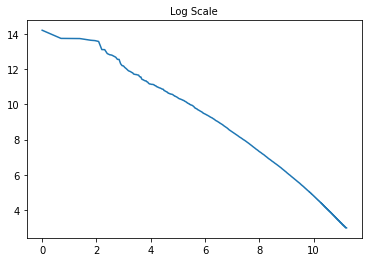

In [6]:
plt.plot(np.log(df['Orden']),np.log(df['Apellido 1']))
plt.title('Log Scale', fontsize=10)
plt.show()

---
### Exercise 4

First, we selected two large values of $x$, in order to compute $a$ and $c$ analytically.

In [7]:
print("x1: 2500 | y1:",df["Apellido 1"].loc[2500],"\nx2: 20000 | y2:",df["Apellido 1"].loc[20000])

x1: 2500 | y1: 1875 
x2: 20000 | y2: 141


Then we proceded to compute $a$ and $c$ replacing the values in the following expressions:

$a =\frac {log(y1) - log(y2)}{log(x1) - log(x2)}$

$log(c) = log(y1) - a \cdot log(x1)$

In [8]:
a = (np.log(1875) - np.log(141))/(np.log(2500) - np.log(20000))
c = np.exp(np.log(1875) - a*np.log(2500))
print("a:",a,"\nc:",c)

a: -1.2443745092906042 
c: 31718394.980060067


Now, we plot the obtained line next to the previous graphic.

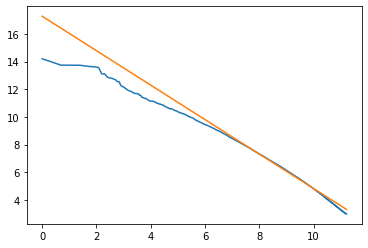

In [9]:
x = df['Orden']
y = a*np.log(x) + np.log(c)
plt.plot(np.log(df['Orden']),np.log(df['Apellido 1']))
plt.plot(np.log(x),y)
plt.show()

As we can see, the obtained line adjusts correctly for larger $x$, but for lower values does not perform correctly.  
We can try to improve the adjustment adding the $b$ parameter on the *power law* and testing several values.

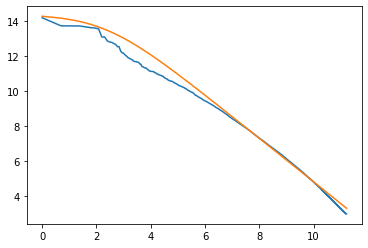

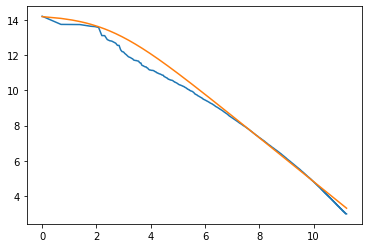

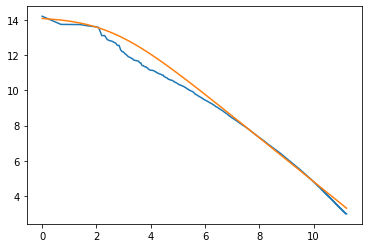

In [12]:
for b in range (10,13):
    x2 = df['Orden']
    y2 = a*np.log(x+b) + np.log(c)
    plt.plot(np.log(df['Orden']),np.log(df['Apellido 1']))
    plt.plot(np.log(x2),y2)
    plt.show()

We also used linear regression to obtain the values of the intercept and the slope.

In [22]:
reg = linear_model.LinearRegression()
reg.fit(np.array(np.log(df['Orden'])).reshape(-1, 1),np.log(df['Apellido 1']))
print(reg.coef_,reg.intercept_)

[-1.32683327] 17.96860738150553


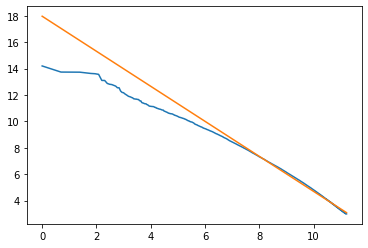

In [24]:
x3 = df['Orden']
y3 = reg.coef_*np.log(x) + reg.intercept_
plt.plot(np.log(df['Orden']),np.log(df['Apellido 1']))
plt.plot(np.log(x3),y3)
plt.show()